# American University of Afghanistan 
 final project of ITC250 spring semester 2024 ***
 professor:  Dr. Ahmed Aljanad

In [1]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd
import seaborn as sns

In [2]:
dfh = pd.read_csv("house_price_dataset_original_v2_cleaned.csv")
dfh

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0,165432
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1,187043
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1,148658
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0,123785
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0,156470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,1,1,1,1,2.9,1,20,0,4.1,3.99,2,235882
4950,302,282,4,2,1,1,1,1,3.8,1,12,1,4.8,2.09,2,290995
4951,153,147,3,4,1,1,0,0,3.3,1,7,0,4.7,3.98,3,106428
4952,180,158,2,1,0,1,0,1,2.2,0,1,0,3.4,3.75,2,107579


In [3]:
## Data Preprocessing
#here to get a better result for our analysis and avoiding any missing data, douplicated, or null values we first clean the data 
dfh.isnull().any()

land_size_sqm                 False
house_size_sqm                False
no_of_rooms                   False
no_of_bathrooms               False
large_living_room             False
parking_space                 False
front_garden                  False
swimming_pool                 False
distance_to_school            False
wall_fence                    False
house_age                     False
water_front                   False
distance_to_supermarket_km    False
crime_rate_index              False
room_size                     False
property_value                False
dtype: bool

In [4]:
# we can see that all the data is clean and there is no null and other constrints 

In [5]:
# Find out the observations numbers
dfh.index

RangeIndex(start=0, stop=4954, step=1)

In [6]:
# Find out the columns name
dfh.columns

Index(['land_size_sqm', 'house_size_sqm', 'no_of_rooms', 'no_of_bathrooms',
       'large_living_room', 'parking_space', 'front_garden', 'swimming_pool',
       'distance_to_school', 'wall_fence', 'house_age', 'water_front',
       'distance_to_supermarket_km', 'crime_rate_index', 'room_size',
       'property_value'],
      dtype='object')

In [7]:
#check the dimensions 
dfh.shape

(4954, 16)

In [8]:
# Checking the datatype  
dfh.dtypes

land_size_sqm                   int64
house_size_sqm                  int64
no_of_rooms                     int64
no_of_bathrooms                 int64
large_living_room               int64
parking_space                   int64
front_garden                    int64
swimming_pool                   int64
distance_to_school            float64
wall_fence                      int64
house_age                       int64
water_front                     int64
distance_to_supermarket_km    float64
crime_rate_index              float64
room_size                       int64
property_value                  int64
dtype: object

In [9]:
dfh_int = dfh.select_dtypes(include=['float64'])
for col in dfh_int.columns.values:
    dfh[col] = dfh[col].astype('int64')
    

In [10]:
dfh_int.dtypes

distance_to_school            float64
distance_to_supermarket_km    float64
crime_rate_index              float64
dtype: object

In [11]:
# Remove leading and trailing whitespaces from all column names
dfh.columns = dfh.columns.str.strip()
dfh

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201,177,3,1,0,1,1,0,3,1,10,0,6,0,0,165432
1,196,182,4,3,1,1,0,1,1,1,11,0,4,1,1,187043
2,198,182,4,4,1,1,0,1,5,0,20,0,2,4,1,148658
3,178,166,2,3,0,1,0,0,5,0,5,0,0,4,0,123785
4,183,165,3,1,1,1,0,0,3,1,8,0,0,0,0,156470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,1,1,1,1,2,1,20,0,4,3,2,235882
4950,302,282,4,2,1,1,1,1,3,1,12,1,4,2,2,290995
4951,153,147,3,4,1,1,0,0,3,1,7,0,4,3,3,106428
4952,180,158,2,1,0,1,0,1,2,0,1,0,3,3,2,107579


In [12]:
# Checking the important featurs of integer variables such as min, max , standard deviation and mean 
dfh.describe()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,250.131409,231.250908,3.788252,3.199839,0.723860,0.763827,0.627574,0.617683,2.955188,0.630400,11.444691,0.048648,3.008074,2.487687,1.738393,201974.738999
std,103.131939,94.571642,1.585371,1.602300,0.447132,0.424772,0.483500,0.486003,1.991403,0.482745,6.356991,0.215152,1.976833,1.714874,0.941126,90031.882219
min,100.000000,85.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32622.000000
25%,180.000000,165.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,1.000000,1.000000,1.000000,136777.000000
50%,235.000000,217.500000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,11.000000,0.000000,3.000000,3.000000,2.000000,194515.500000
75%,295.000000,274.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,17.000000,0.000000,5.000000,4.000000,2.000000,246590.000000
max,796.000000,760.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,22.000000,1.000000,6.000000,5.000000,3.000000,692086.000000


In [13]:
#Questions and Data Analysis:
#Question1: How does the price value differ between houses that have more living room and those that do not?

In [15]:
averagevalue_with_largelivingroom = dfh[dfh['large_living_room'] == 1]['property_value'].mean()
averagevalue_without_largelivingroom = dfh[dfh['large_living_room'] == 0]['property_value'].mean()

print(f"Average property value for houses with a large living room: {averagevalue_with_largelivingroom}")
print(f"Average property value for houses without a large living room: {averagevalue_without_largelivingroom}")

Average property value for houses with a large living room: 224484.80145008367
Average property value for houses without a large living room: 142968.09868421053


In [ ]:
# we can see that almost 4 million is the difference in the price of a hauses contains having 
#living rooms inside instead those have only 4 rooms

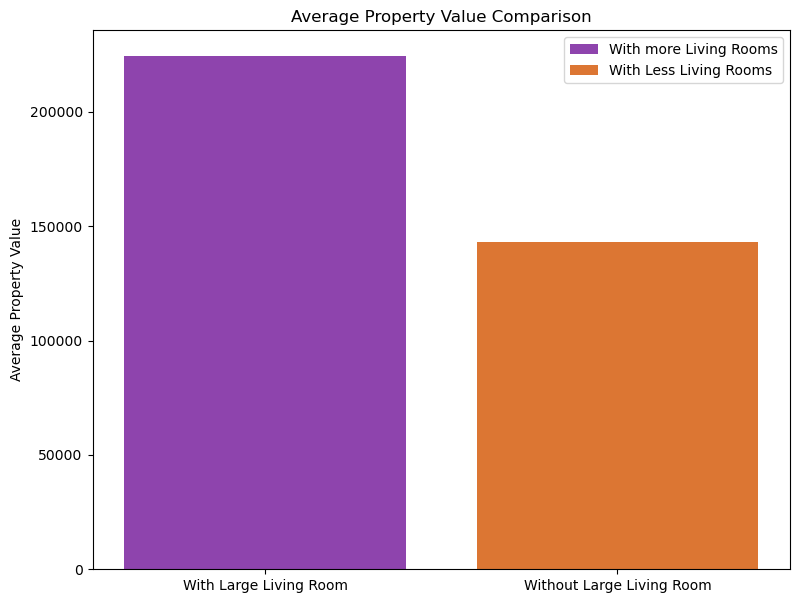

In [16]:
# Average property values
averagevalue_with_largelivingroom = 224484.80145008367
averagevalue_without_largelivingroom = 142968.098684210532

# Create a bar plot
plt.figure(figsize=(9, 7))
categories = ['With Large Living Room', 'Without Large Living Room']
average_values = [averagevalue_with_largelivingroom, averagevalue_without_largelivingroom]

# Plot the bars with labels
bars = plt.bar(categories, average_values, color=['#8E44AD', '#DC7633'])
plt.legend(bars, ['With more Living Rooms', 'With Less Living Rooms'])
plt.title('Average Property Value Comparison')
plt.ylabel('Average Property Value')
plt.show()

In [ ]:
#This barplot shows that homes with and without a large living room have significantly different average property values.
#Homes with a large living room have an average property value of $224,484.80, while homes without a large living 
#room have an average property value of $42,968.10. Consequently, a large living room may increase the overall 
#value of the home.  

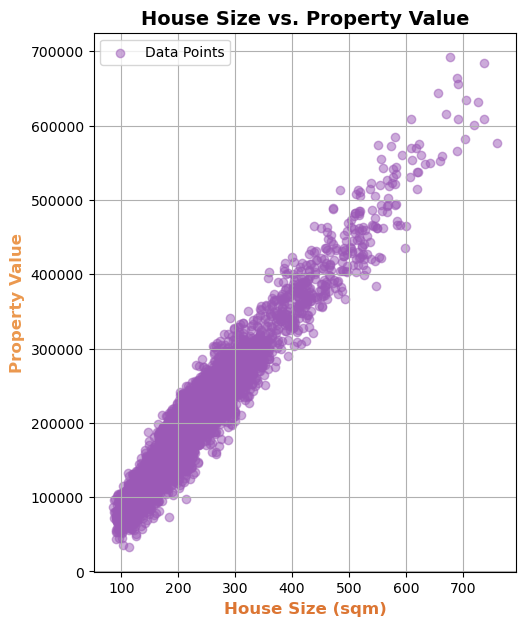

In [17]:
##Question 2: What is the relationship between the House size and property values?

plt.figure(figsize=(12, 7))

# Scatter plot for Land Size vs. Property Value
plt.subplot(1, 2, 1)
plt.scatter(dfh['house_size_sqm'], dfh['property_value'], alpha=0.5, color='#9B59B6', marker='o')
plt.grid(True)
plt.title('House Size vs. Property Value',fontsize=14, fontweight='bold')
plt.xlabel('House Size (sqm)', fontsize=12, fontweight='bold', color='#DC7633')
plt.ylabel('Property Value', fontsize=12, fontweight='bold', color='#EB984E')

plt.legend(['Data Points'])

plt.show()




In [ ]:
#Evaluation: 
## The scatterplot illustrates a strong and positive correlation between house size and property value. 
##There is a clear trend in property values rising in tandem with house size increases. 
##This positive association suggests that larger houses are associated with higher property values, which is
##a significant factor in real estate valuation.


In [18]:
##Question3: Which room size is most commonly preferred by homebuyers?
roomsize_frequency = dfh['room_size'].value_counts()

# Print the frequency of each room size
print(roomsize_frequency)

2    1779
1    1460
3    1198
0     517
Name: room_size, dtype: int64


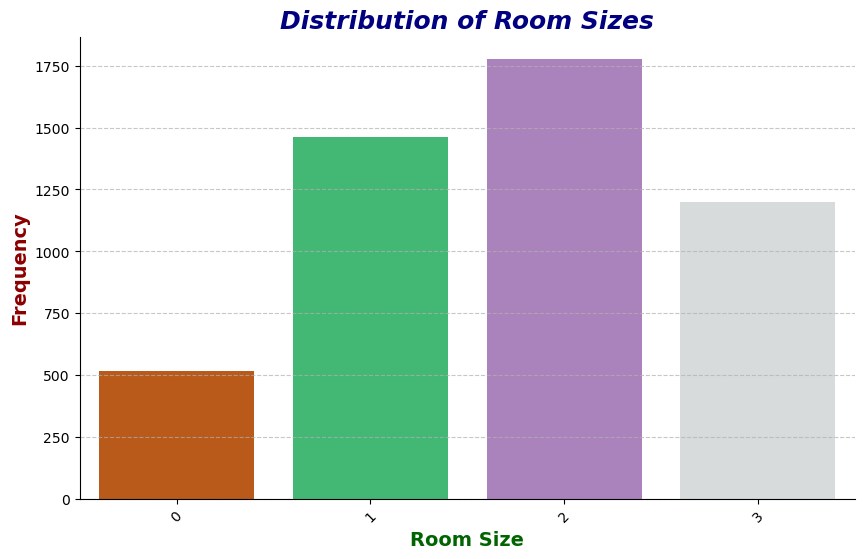

In [20]:
plt.figure(figsize=(10, 6))

sns.countplot(x='room_size', data=dfh, palette=["#D35400", "#2ECC71", "#AF7AC5", "#D7DBDD"])
plt.title('Distribution of Room Sizes', fontsize=18, fontweight='bold', color='navy', fontstyle='italic')
plt.xlabel('Room Size', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkred')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(right=True, top=True)

plt.show()


In [ ]:
#Analysis: The bar plot shows that most people prefer large rooms based on the room size categories (small=0, medium=1, large=2,
#and extra-large= 3). The fact that it's the most chosen choice suggests that more room is desperately needed. 
#The fact that medium-sized rooms are the second most popular choice suggests that many buyers want a nice but not 
#overly large space. Next, many buyers are drawn to rooms that are exceptionally large. On the other hand, smaller rooms are
#the least popular kind of living space since fewer people choose to live in them.
#This breakdown shows the typical ranges of room sizes that buyers select when buying a property.

In [21]:
# Question4:How many houses have a swimming pool, and how many do not?
# 'swimming_pool' is the column of interest (1: Yes, 0: No)
pool_distribution = dfh['swimming_pool'].value_counts()

print("Distribution of Houses based on Swimming Pool:")
print(f"Houses without a swimming pool: {pool_distribution[0]}")
print(f"Houses with a swimming pool: {pool_distribution[1]}")

Distribution of Houses based on Swimming Pool:
Houses without a swimming pool: 1894
Houses with a swimming pool: 3060


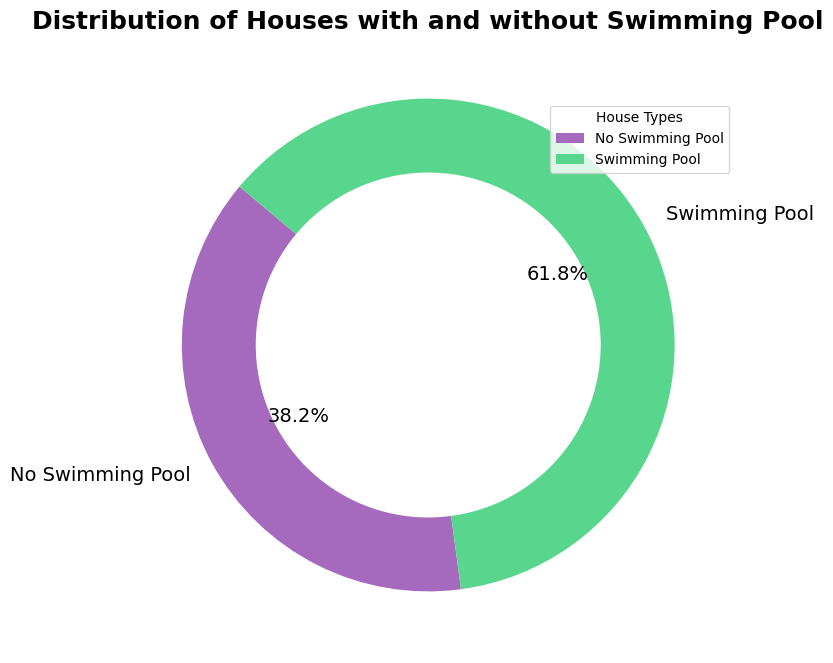

In [25]:

import matplotlib.pyplot as plt

# Counts based on your provided output
houseswithout_pool = 1894
houseswith_pool = 3060

# Plotting a pie chart 
labels = ['No Swimming Pool', 'Swimming Pool']
sizes = [houseswithout_pool, houseswith_pool]
colors = ['#A569BD', '#58D68D']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'color': 'black'})
plt.title('Distribution of Houses with and without Swimming Pool', fontsize=18, fontweight='bold', color='black')
plt.legend(title='House Types', loc='upper right', bbox_to_anchor=(1, 0.9))
centre_circle = plt.Circle((0,0),0.70,fc='white')## Add a circle at the center to make it look like a donut chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


In [ ]:
#Analysis: The dataset indicates that a significant portion of homes—roughly 61.8% of all houses—have swimming pools.
#Conversely, less than 38.2% of homes lack a swimming pool.
#This suggests that among the homes in the dataset, having a swimming pool is a common feature.

In [26]:
#Question5: What is the distribution of houses across specific age ranges, and how many houses fall into each range?
# Part1:  find the counts of each unique value in the 'house_age' column
age_counts = dfh['house_age'].value_counts()

age_counts

9     246
1     240
17    239
3     238
20    235
4     234
16    233
11    232
13    232
15    231
7     230
2     225
12    222
19    218
21    217
22    217
5     214
18    213
14    210
8     210
10    210
6     208
Name: house_age, dtype: int64

In [ ]:
#We can perform the computation for the analysis above as follows:
#9: 246 denotes that there are 246 homes where the age is nine.
#First, 240 denotes the number of houses that are 240 years old.
#17: 239 indicates that 239 homes contain people who are 17 years old.
##The counts assist you in figuring out the distribution of house ages in your dataset. 
#The most prevalent age among the houses is the one with the highest count (246).

In [27]:
#Lets make age ranges based on the age of house we have
bins = [0, 5, 10, 15, 20, 25]

# Create a new column 'age_range' with the corresponding age range for each house
dfh['age_range'] = pd.cut(dfh['house_age'], bins=bins)

# Count the number of houses in each age range
housecount_by_agerange = dfh['age_range'].value_counts().sort_index()

print(housecount_by_agerange)


(0, 5]      1151
(5, 10]     1104
(10, 15]    1127
(15, 20]    1138
(20, 25]     434
Name: age_range, dtype: int64


<Figure size 1000x600 with 0 Axes>

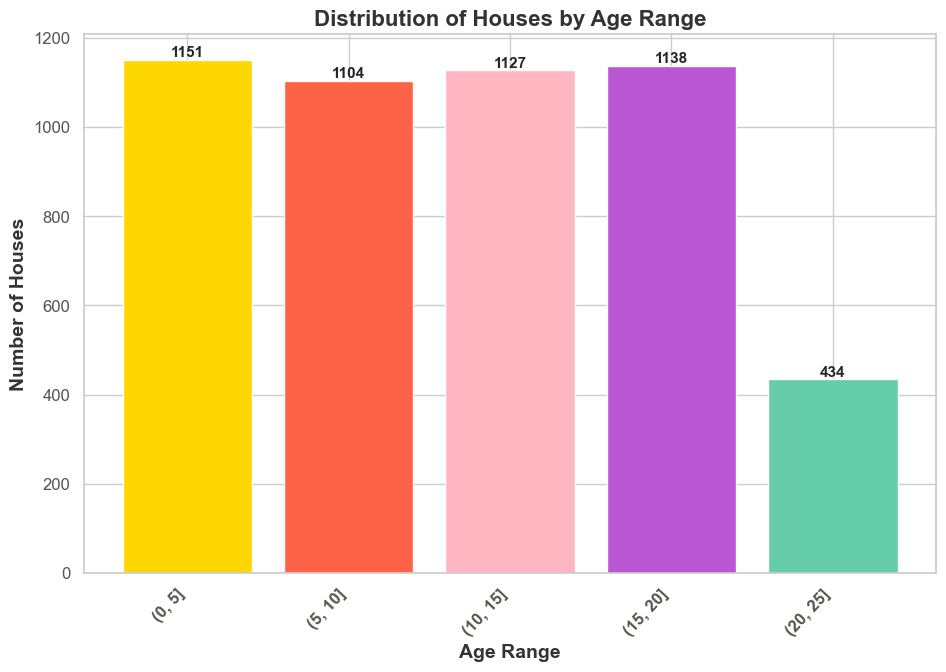

In [29]:
# Let's view the number of houses in each range in a graph
plt.figure(figsize=(10, 6))
colors = ['#FFD700', '#FF6347', '#FFB6C1', '#BA55D3', '#66CDAA']
sns.set(style="whitegrid", rc={"grid.linewidth": 1})
plt.figure(figsize=(11, 7))
# Plotting the bar graph with annotations
bars = plt.bar(housecount_by_agerange.index.astype(str), housecount_by_agerange, color=colors)#This is often done when you want
#to use the index values as labels in a plot.
# Adding annotations (numbers) on top of each bar
plt.bar_label(bars, labels=housecount_by_agerange, label_type='edge', fontsize=11,fontweight='bold')
plt.title('Distribution of Houses by Age Range', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Age Range', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Number of Houses', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(fontsize=12, rotation=47, ha='right', color='#555550', fontweight='bold')  
plt.yticks(fontsize=12, color='#555556')  
plt.show()



In [ ]:
#Evaluation: #The breakdown indicates the proportion of houses in each age group. 
#There are 1151 of them for houses that are 0 to 5 years old. There are 1104 houses in the age range of 5 to 10.
#There are still 1127 houses for children aged 10 to 15, 1138 for children aged 15 to 20, and 434 for children aged 20 to 25.
#We can see how many homes were constructed during particular time periods thanks to this breakdown. 
#It provides us with a better image of the distribution over time, similar to looking at snapshots of 
#the times when houses were built.

In [30]:
#Question6:What is the relationship between property values and the presence of a wall fence?
#Group the data by 'wall_fence' and calculate the mean property value for each group
propertyvalues_byfence = dfh.groupby('wall_fence')['property_value'].mean()
propertyvalues_byfence

wall_fence
0    139652.364282
1    238514.049952
Name: property_value, dtype: float64

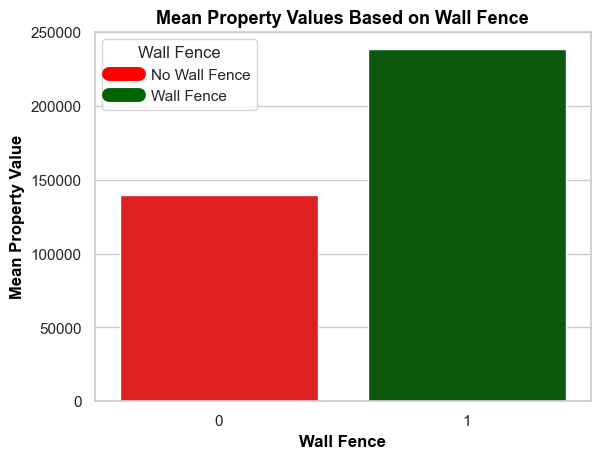

In [36]:

# Design a bar plot to visualize the mean property values based on the presence of a wall fence
sns.set(style="whitegrid")  
colors = ['red', 'darkgreen']
ax = sns.barplot(x=propertyvalues_byfence.index, y=propertyvalues_byfence.values, palette=colors, label='Mean Property Value')
legend_labels = ['No Wall Fence', 'Wall Fence']
legend_handles = [plt.Line2D([0], [0], color=color, lw=10) for color in colors]
ax.legend(legend_handles, legend_labels)
ax.legend(legend_handles, legend_labels, title='Wall Fence')

# Style x-label, y-label, and title
ax.set_xlabel('Wall Fence', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('Mean Property Value', fontsize=12, fontweight='bold', color='black')
ax.set_title('Mean Property Values Based on Wall Fence', fontsize=13, fontweight='bold', color='black')

plt.show()

In [ ]:
#The dataset indicates that the average property value of properties with a wall fence is approximately $238,514.05, 
#whereas the average value of properties without a wall fence is approximately $139,652.36, which is lower. 
#This implies that having a wall fence is generally linked to higher property values. The two groups' mean 
#property values differ noticeably, suggesting that the presence of a wall fence may have an effect on property
#values in this particular situation.

In [37]:
#Question7: What insights can homeowners, real estate brokers, or property investors gain from this relationship,
#and how does the number of bathrooms affect the average property values in the dataset?
#Verifying the number of bathrooms
unique_bathroomvalues = dfh['no_of_bathrooms'].unique()

print("Unique values of number of bathrooms:", unique_bathroomvalues)

Unique values of number of bathrooms: [1 3 4 5 2 8 7 6 9]


In [38]:
# Group the data by 'no_of_bathrooms' and calculate the mean property value for each group
property_valuesby_bathrooms = dfh.groupby('no_of_bathrooms')['property_value'].mean()

property_valuesby_bathrooms

no_of_bathrooms
1    116922.651926
2    168651.981224
3    191249.041306
4    219130.970526
5    251187.217213
6    383169.756303
7    369567.619048
8    430484.383333
9    507467.619048
Name: property_value, dtype: float64

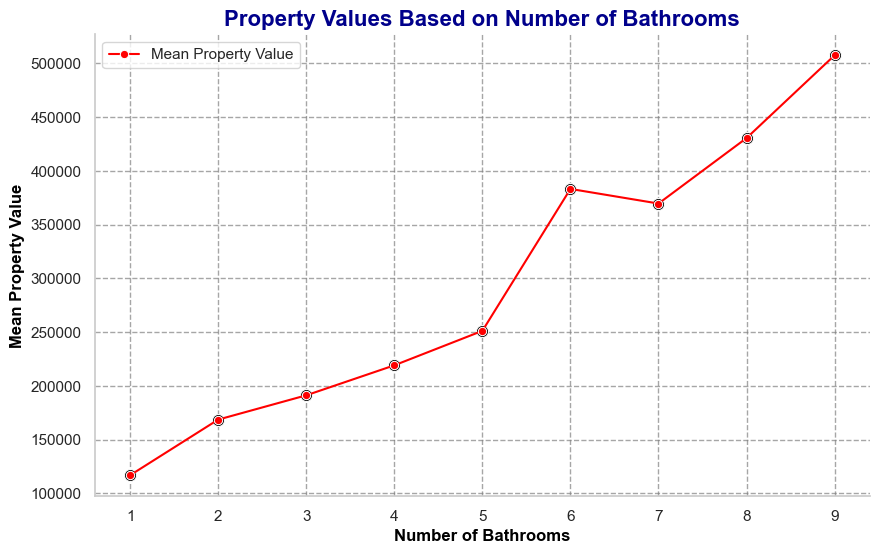

In [46]:
# To see the property values based on the number of bathrooms, create a line plot.
# Adopt the Seaborn fashion
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
line_color = 'red'
marker_color = 'black'
# Line plot
sns.lineplot(x=property_valuesby_bathrooms.index, y=property_valuesby_bathrooms.values, color=line_color, marker='o', label='Mean Property Value')

# Scatter plot for markers
sns.scatterplot(x=property_valuesby_bathrooms.index, y=property_valuesby_bathrooms.values, color=marker_color, s=75)
plt.xlabel('Number of Bathrooms', fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Mean Property Value', fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.title('Property Values Based on Number of Bathrooms', fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': 'darkblue'})
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7, color="gray")  # Add a dashed grid
sns.despine()  # Remove the top and right spines for aesthetics
plt.show()

In [ ]:
#The results shown here show the average property values in a given dataset, broken down by the number of bathrooms.
#From 1 to 9, the number of bathrooms indicated by each row. The average property value for each category, as determined
#by calculation, provides information about potential price effects related to bathroom count. Notably, it implies that
#higher average property values are linked to an increase in the number of bathrooms. 
#For instance, the average value of a home with one bathroom is about $116,922.65, whereas the average value
#of a home with two bathrooms is about $168,651.98. As long as this trend persists, there is a positive correlation
#between the dataset's property values and the number of bathrooms.For those in the real estate industry, 
#this information can be helpful as it offers a deeper comprehension of the variables affecting property values.

In [47]:
# Finding Correlation with respect to 'property_value'
correlation_matrix = dfh.corr()

# Extract correlation values with respect to 'property_value'
property_corr = correlation_matrix['property_value']

# Display the correlation values
print(property_corr)


land_size_sqm                 0.973662
house_size_sqm                0.964163
no_of_rooms                   0.912155
no_of_bathrooms               0.686525
large_living_room             0.404843
parking_space                 0.459860
front_garden                  0.543363
swimming_pool                 0.569673
distance_to_school           -0.069958
wall_fence                    0.530090
house_age                    -0.037958
water_front                   0.095613
distance_to_supermarket_km   -0.029870
crime_rate_index             -0.069866
room_size                     0.317842
property_value                1.000000
Name: property_value, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_5788\4021513252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfh.corr()


In [48]:
#Analysis: The correlation coefficient's magnitude, which approaches either 1 or -1, indicates the strength of the relationship
#between the variables, while its positive or negative sign indicates whether there is a positive or negative relationship
#between the variables. Negative correlations show a propensity for variables to move in the opposite direction from one another,
#whereas positive correlations suggest that variables tend to increase or decrease together. In conclusion, there are strong 
#positive correlations between property values and the following variables: land size, house size, number of rooms, front garden,
#swimming pool, and parking space; on the other hand, there are weak to very weak correlations between property values and the 
#following variables: distance to school, house age, distance to supermarket, and crime rate index. These correlations shed 
#light on the characteristics that have a greater bearing on property values.

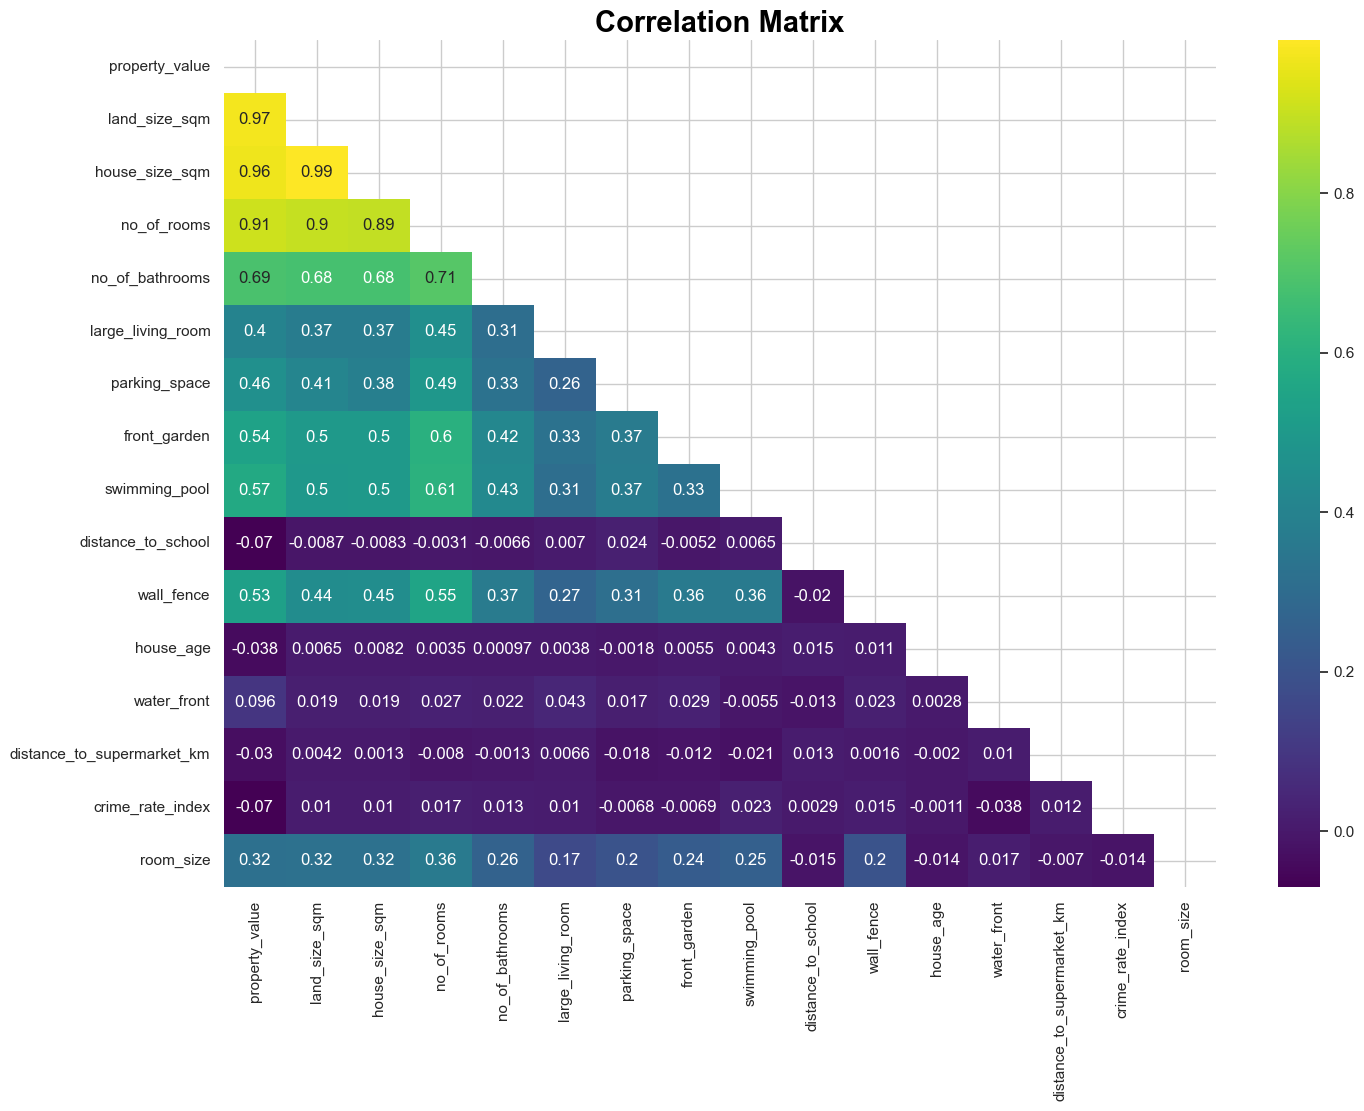

In [49]:
# Lets visualize the correlataion of all variables with respect to to my dependent variable("property value")

attributes = ['property_value', 'land_size_sqm', 'house_size_sqm', 'no_of_rooms', 'no_of_bathrooms', 
              'large_living_room', 'parking_space', 'front_garden', 'swimming_pool', 'distance_to_school', 
              'wall_fence', 'house_age', 'water_front', 'distance_to_supermarket_km', 'crime_rate_index', 
              'room_size']


correlation_matrix = dfh[attributes].corr()# Creating a correlation matrix
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style("whitegrid")
# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", annot_kws={"size": 12}, mask=mask)
plt.title('Correlation Matrix', fontsize=21, fontweight='bold', color='black')

plt.show()


In [50]:
#Analysis: The correlation coefficient's magnitude, which approaches either 1 or -1, indicates the strength of the relationship
#between the variables, while its positive or negative sign indicates whether there is a positive or negative relationship
#between the variables.
#Negative correlations show a propensity for variables to move in the opposite direction from one another, whereas positive 
#correlations suggest that variables tend to increase or decrease together. #In summary, the variables like land size,
#house size, number of rooms, number of bathrooms, front garden, swimming pool,and parking space have strong positive 
#correlations with property values, while variables like distance to school, house age, distance to supermarket, and crime 
#rate index have weak to very weak correlations. These correlations provide
#insights into which features are more influential in determining property values.
#variables like land size(0.97), house size (0.96), number of rooms (0.91),number of bathrooms(0.69) front garden(0.54),
#swimming pool(0.57) have high positive correlations with property value. 

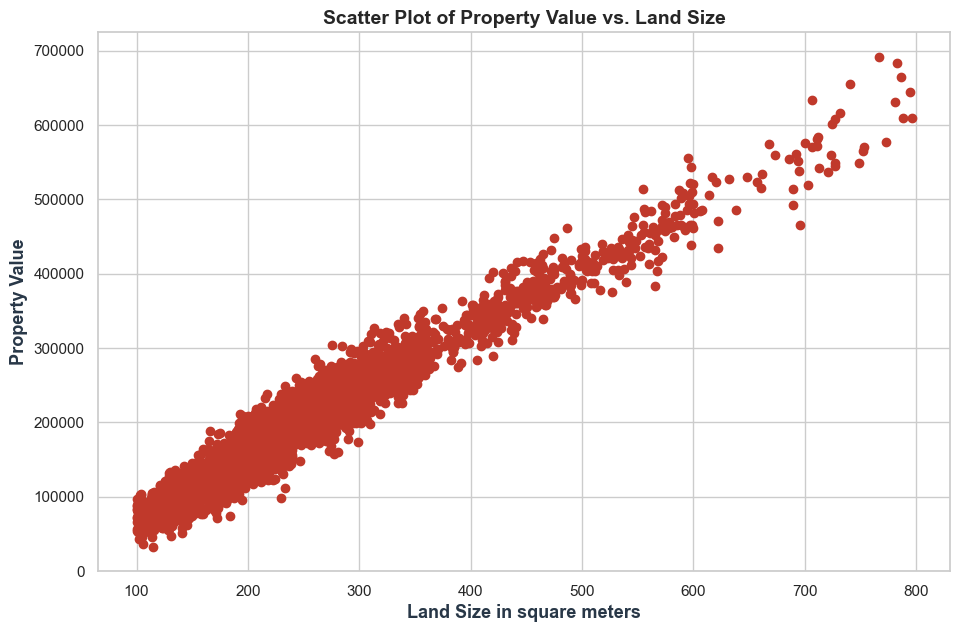

In [53]:
# Based on correlation Materix, "land size" has the highest Corelations:
plt.figure(figsize=(11, 7))
plt.scatter(dfh["land_size_sqm"], dfh["property_value"], color='#C0392B')  
plt.xlabel("Land Size in square meters", fontsize=13, fontweight='bold', color='#283747')  
plt.ylabel("Property Value", fontsize=13, fontweight='bold', color="#283747")  
plt.title("Scatter Plot of Property Value vs. Land Size", fontsize=14, fontweight='bold')  
plt.show()

In [54]:
#Data Modeling and Predictions:
# Importing necessassary packages and libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [55]:
# Defining the Independent variable and dependent variable 
#Note:  we use one independent variable in Simple Linear Regression Model.

x0= dfh[["land_size_sqm"]] # Independent/Predictor variable 

y0= dfh["property_value"]# Dependent/Target variable

# Splitting the dataset into two parts, 80% of data is for training and 20% of data is for testing 
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size= 0.2)


mdl0 = LinearRegression()# Calling the Linear Regression function/model

mdl0.fit(x0_train, y0_train)# Fitting the training data into model

y_pred0= mdl0.predict(x0_test)# The 20% of independent variables are used for testing

# Putting the actual and predicted data together in one dataframe to compare
dfh_pred0= pd.DataFrame({'Actual': y0_test, 'Predicted': np.ceil(y_pred0) })
dfh_pred0

,Actual,Predicted
1924,230946,204315.0
3457,243714,283338.0
378,291314,273141.0
4128,122039,149084.0
2861,226976,240852.0
...,...,...
93,192284,155032.0
1913,121788,115945.0
3939,77721,81956.0
4246,181069,163529.0


In [56]:
# Checking the accuracy of linear regession model 
mdl0.score(x0_test, y0_test)*100

94.338915850676

In [57]:
#The here the accuracy score is, the higher is the accuracy of our model

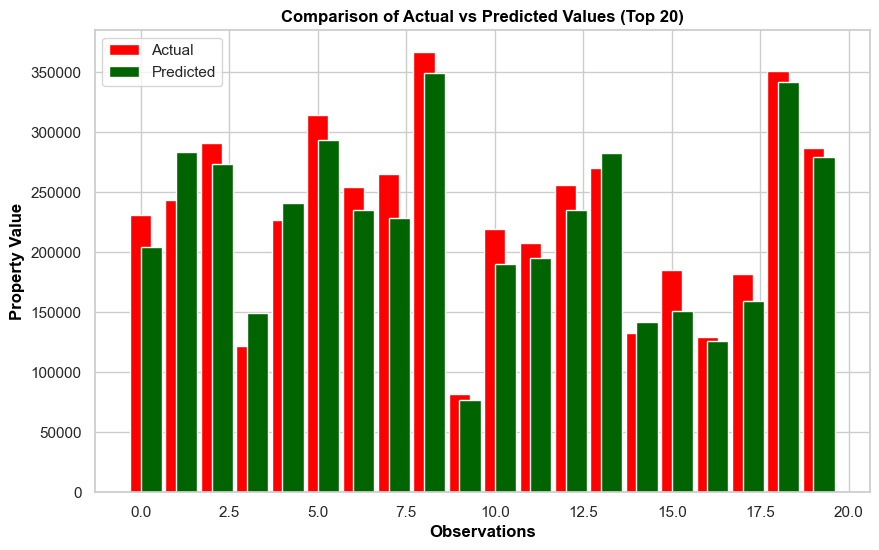

In [59]:
# Comparing graph of test data (20%) to check the accuracy of the model.
# Because the dataset is large, we take only 20 observations from actual and predicted data for plotting and comparing easily

x = np.arange(dfh_pred0.head(20).shape[0])

plt.figure(figsize=(10, 6))
plt.bar(x, dfh_pred0.head(20).Actual, width=0.6, color="red", label="Actual")
plt.bar(x + 0.3, dfh_pred0.head(20).Predicted, width=0.6, color="darkgreen", label="Predicted")

plt.xlabel('Observations', color='black', fontweight='bold')
plt.ylabel('Property Value', color='black', fontweight='bold')
plt.title('Comparison of Actual vs Predicted Values (Top 20)', color='black', fontweight='bold')
plt.legend()
plt.show()

In [60]:
# To check the Mean Squared Error rate 
print("MSE:", np.sqrt( metrics.mean_squared_error(y0_test, y_pred0 )) )

MSE: 20546.5846857078


In [61]:
#When we have the less Root Mean Squared Error is,we have the accurate the model.

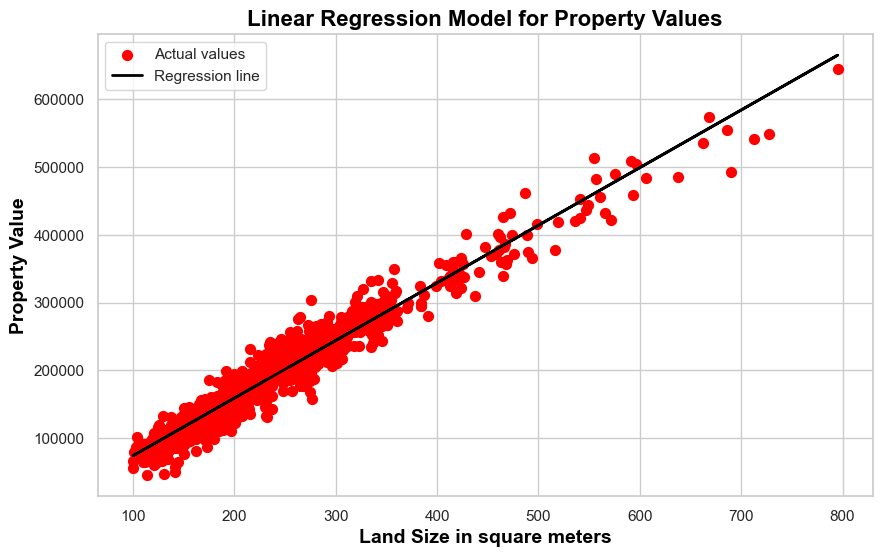

In [63]:
# Now let's plot our linear regression model line
x0_test_single_column = x0_test['land_size_sqm']
plt.figure(figsize=(10, 6))

# Plotting the model accuracy using scatter plot and linear regression model
plt.scatter(x0_test_single_column, y0_test, color='red', label='Actual values', marker='o', s=50)

# Now let's plot our linear regression model line
plt.plot(x0_test_single_column, y_pred0, color='black', linewidth=2, label='Regression line')

plt.xlabel("Land Size in square meters", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Property Value", fontsize=14, fontweight='bold', color='black')
plt.title("Linear Regression Model for Property Values", fontsize=16, fontweight='bold', color='black')
plt.legend()
plt.show()


In [64]:
#Multiple Linear Regression Model:
# Defining the Independent variable and dependent variable
#Note:  we use Multiple independent variables in Multiple Linear Regression Model
# Independents/Predictors variable
x= dfh[["land_size_sqm", "house_size_sqm", "no_of_rooms", "no_of_bathrooms", "swimming_pool"]]



y= dfh["property_value"] # Dependent/Target variable

# Splitting the dataset into two parts, 80% of data is for training and 20% of data is considered for testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)


mdl = LinearRegression()# Calling the Linear Regression function/model


mdl.fit(x_train, y_train)# Fitting the training data into model


y_pred= mdl.predict(x_test)# The 20% of independent variables are used for testing

# Putting the actual and predicted data together in one dataframe to compare
dfh1_pred= pd.DataFrame({'Actual': y_test, 'Predicted': np.ceil(y_pred) })
dfh1_pred

,Actual,Predicted
536,176495,178272.0
813,222813,236604.0
4524,68156,71707.0
2051,86993,80160.0
832,306299,298710.0
...,...,...
1337,227780,212547.0
4287,459856,460433.0
1024,212986,192853.0
1666,464909,458140.0


In [65]:
# # Checking the accuracy of linear regession model 
mdl.score(x_test, y_test)*100

96.0820227155419

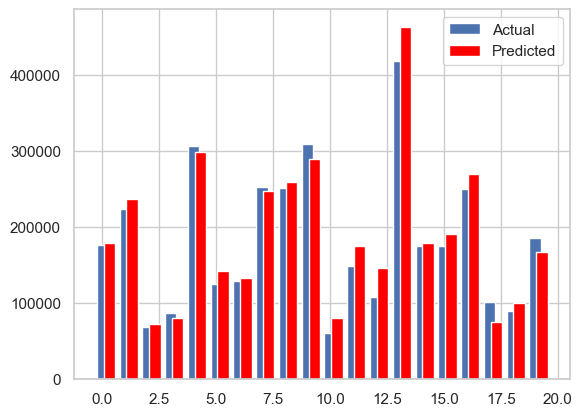

In [67]:
# Beacuse the dataset is large, we take only 20 observations from actual and predicted data to compare easliy 
x= np.arange(dfh1_pred.head(20).shape[0])
plt.bar(x,dfh1_pred.head(20).Actual, width=0.5)
plt.bar(x+0.3, dfh1_pred.head(20).Predicted, width=0.5,color="red")
plt.legend(labels=["Actual","Predicted"])

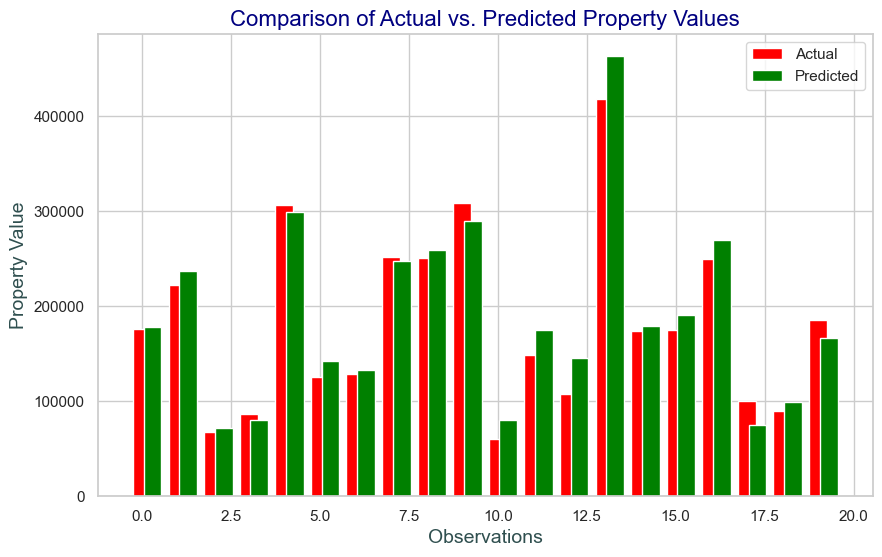

In [69]:
# Because the dataset is large, we take only 20 observations from actual and predicted data to compare easily
x = np.arange(dfh1_pred.head(20).shape[0])
plt.figure(figsize=(10, 6))
plt.bar(x, dfh1_pred.head(20).Actual, width=0.5, color="red", label="Actual")
plt.bar(x + 0.3, dfh1_pred.head(20).Predicted, width=0.5, color="green", label="Predicted")

plt.legend()
plt.title("Comparison of Actual vs. Predicted Property Values", fontsize=16, color="navy")
plt.xlabel("Observations", fontsize=14, color="darkslategray")
plt.ylabel("Property Value", fontsize=14, color="darkslategray")

# Displaying the plot
plt.show()